In [1]:
from sklearn.datasets import load_iris
import pandas as pd
iris=load_iris()
from sklearn.cluster import KMeans

In [2]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
df.drop(["sepal length (cm)","sepal width (cm)"],axis=1,inplace=True)
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


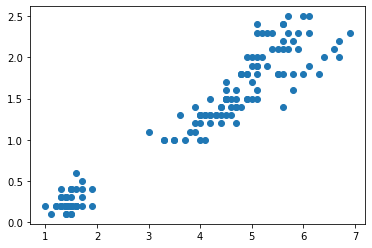

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df["petal length (cm)"],df["petal width (cm)"])

In [6]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
Scaler.fit(df[["petal length (cm)"]])
Scaler.fit(df[["petal width (cm)"]])
df["petal length (cm)"]=Scaler.transform(df[["petal length (cm)"]])
df["petal width (cm)"]=Scaler.transform(df[["petal width (cm)"]])

In [7]:
df

,petal length (cm),petal width (cm)
0,0.541667,0.041667
1,0.541667,0.041667
2,0.500000,0.041667
3,0.583333,0.041667
4,0.541667,0.041667
...,...,...
145,2.125000,0.916667
146,2.041667,0.750000
147,2.125000,0.791667
148,2.208333,0.916667


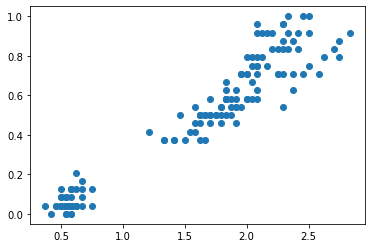

In [8]:
plt.scatter(df["petal length (cm)"],df["petal width (cm)"])

In [9]:
c=KMeans(n_clusters=2)

In [10]:
y_pred=c.fit_predict(df[["petal length (cm)","petal width (cm)"]])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
df["cluster"]=y_pred
df

,petal length (cm),petal width (cm),cluster
0,0.541667,0.041667,1
1,0.541667,0.041667,1
2,0.500000,0.041667,1
3,0.583333,0.041667,1
4,0.541667,0.041667,1
...,...,...,...
145,2.125000,0.916667,0
146,2.041667,0.750000,0
147,2.125000,0.791667,0
148,2.208333,0.916667,0


In [12]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
c.cluster_centers_

array([[2.01052189, 0.65909091],
       [0.58006536, 0.06781046]])

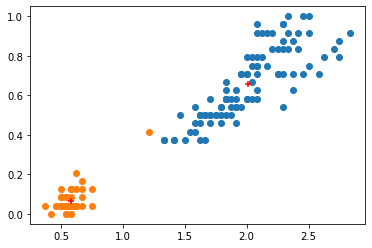

In [13]:
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"])
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"])
plt.scatter(c.cluster_centers_[:,0],c.cluster_centers_[:,1],color="red",marker="+")

In [14]:
ssm=[]
k_rng=range(1,30)
for k in k_rng:
    kc=KMeans(n_clusters=k)
    kc.fit(df[["petal length (cm)","petal width (cm)"]])
    ssm.append(kc.inertia_)

C:\Users\Usman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


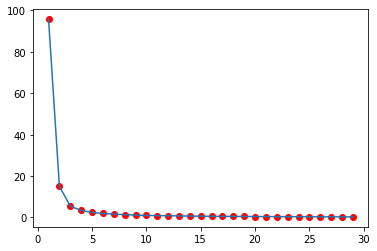

In [15]:
plt.plot(k_rng,ssm)
plt.scatter(k_rng,ssm,color="red")

In [16]:
c2=KMeans(n_clusters=3)

In [17]:
df["cluster"]=c2.fit_predict(df[["petal length (cm)","petal width (cm)"]])

In [18]:
df.cluster.unique()

array([1, 2, 0])

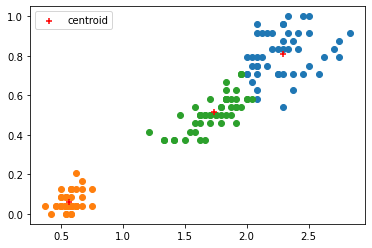

In [24]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],)
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],label='df3')
plt.scatter(df3["petal length (cm)"],df3["petal width (cm)"],label='df3')
c2.cluster_centers_
plt.scatter(c2.cluster_centers_[:,0],c2.cluster_centers_[:,1],color="red",marker="+",label='centroid')
plt.legend()


In [31]:
sse2=[]
k_rng=range(1,15)
for k in k_rng:
    c=KMeans(n_clusters=k)
    c.fit(df[["petal length (cm)","petal width (cm)"]])
    sse2.append(c.inertia_)
print(sse2)

C:\Users\Usman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[95.641550925926, 14.998302056512841, 5.446416488603989, 3.3824654339731097, 2.416129992692494, 1.9140876927518014, 1.6134326229220393, 1.3321424201725784, 1.1356917467764396, 0.9597480434643424, 0.8953559092958602, 0.8211287827096652, 0.7623540145494068, 0.6834877217689718]


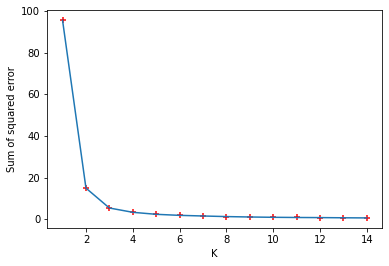

In [28]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse2)
plt.scatter(k_rng,sse2,color="red",marker="+")